In [2]:
from data_utils import *
from model_utils import *

import os
from tqdm import tqdm
import json

In [81]:
os.listdir('./data/BOCS_EXP/')

['dictRS_5_01.json',
 'dictBOCS_5_lamb01_02.json',
 'dictRS_5_lamb01_02.json',
 'dictRS_15_lamb01_GT_03.json',
 'dictBOCS_16_00.json',
 'dictRS_5_lamb01_GT_02.json',
 'dictBOCS_5_lamb01_GT_02.json',
 'dictBOCS_5_01.json',
 'dictRS_16_00.json',
 'dictBOCS_15_lamb01_GT_03.json',
 'dictRS.json']

In [83]:
# Load data
with open('./data/BOCS_EXP/dictBOCS_5_lamb01_GT_02.json', 'r+') as f:
    dictBOCS = json.load(f)
with open('./data/BOCS_EXP/dictRS_5_lamb01_GT_02.json', 'r+') as f:
    dictRND = json.load(f)
    
# Load data
with open('./data/BOCS_EXP/dictBOCS_15_lamb01_GT_03.json', 'r+') as f:
    dictBOCS = json.load(f)
with open('./data/BOCS_EXP/dictRS_15_lamb01_GT_03.json', 'r+') as f:
    dictRND = json.load(f)
    
#dictBOCS.update(dictBOCS2)
#dictRND.update(dictRND2)

In [87]:
minV = min(pd.DataFrame(dictRND).min())
maxV = max(pd.DataFrame(dictRND).max())

# Compute regret
dictBOCS_new = {}
for k in dictBOCS.keys():
    dictBOCS_new[k] = list((np.array(dictBOCS[k]) - np.array([minV]*len(dictBOCS[k])))) # / (maxV - minV))
                           
dictRND_new = {}
for k in dictRND.keys():
    dictRND_new[k] = list((np.array(dictRND[k]) - np.array([minV]*len(dictRND[k]))))
    
dictBOCS = dictBOCS_new
dictRND  = dictRND_new


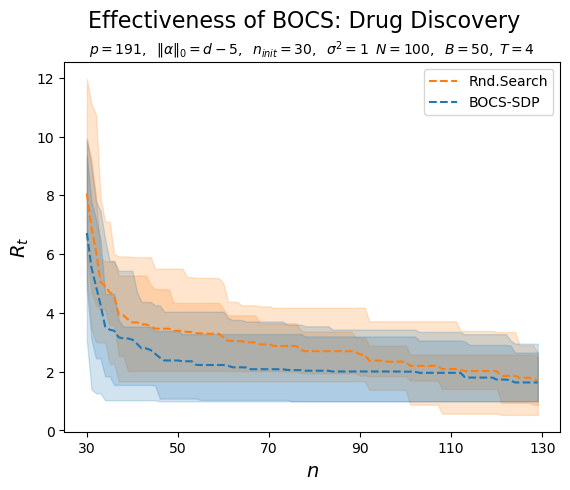

In [88]:
# Plot
fig,ax = plt.subplots()
x_ = np.array(range(30, 130))
  
# mean
y_mean  = np.array(pd.DataFrame(dictRND).mean(axis=1))
ax.plot(x_, y_mean, '--', color='tab:orange')

#plt.plot(range(20, 120), [mse_**2 for mse_ in mse])
plt.xticks([10,30,50,70,90,110,130])

# compute upper lower
y_lower = np.array(pd.DataFrame(dictRND).quantile(0.1, axis=1))
y_upper = np.array(pd.DataFrame(dictRND).quantile(0.9, axis=1))
        
# plot our confidence band
ax.fill_between(x_, y_lower, y_upper, alpha=0.2, color='tab:orange')

# compute upper lower
y_lower = np.array(pd.DataFrame(dictRND).quantile(0.25, axis=1))
y_upper = np.array(pd.DataFrame(dictRND).quantile(0.75, axis=1))
ax.fill_between(x_, y_lower, y_upper, alpha=0.2, color='tab:orange')

# compute upper lower
y_lower = np.array(pd.DataFrame(dictBOCS).quantile(0.1, axis=1))
y_upper = np.array(pd.DataFrame(dictBOCS).quantile(0.9, axis=1))
        
# plot our confidence band
ax.fill_between(x_, y_lower, y_upper, alpha=0.2, color='tab:blue')

# compute upper lower
y_mean  = np.array(pd.DataFrame(dictBOCS).mean(axis=1))
ax.plot(x_, y_mean, '--', color='tab:blue')
y_lower = np.array(pd.DataFrame(dictBOCS).quantile(0.25, axis=1))
y_upper = np.array(pd.DataFrame(dictBOCS).quantile(0.75, axis=1))
ax.fill_between(x_, y_lower, y_upper, alpha=0.2, color='tab:blue')

# ticks
plt.suptitle('Effectiveness of BOCS: Drug Discovery', fontsize=16, y=0.99)
plt.title(r'$p=191, \; \; \Vert \alpha \Vert_{0} = d - 5, \; \; n_{init}=30, \;\; \sigma^{2} = 1 \; \; N=100, \; \; B = 50, \; T=4$', fontsize=10)
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$R_{t}$', fontsize=14)
plt.legend({'Rnd.Search' : 'Random', 'BOCS-SDP' : 'BOCS-SDP'})
#plt.axhline(y=0.06, linestyle='--', c='grey', linewidth=0.75, xmin=0.05, xmax=0.95)
#plt.text(s=r'$\sigma^{2} tr((X^{\top} X )^{-1})$', y=0.06, x=-26, fontsize=8, c='#525252')

plt.show()

In [35]:
minV = min(pd.DataFrame(dictRND).min())
maxV = max(pd.DataFrame(dictRND).max())

In [45]:
dictBOCS_new = {}
for k in dictBOCS.keys():
    dictBOCS_new[k] = list((np.array(dictBOCS[k]) - np.array([minV]*len(dictBOCS[k]))) / (maxV - minV))

In [46]:
dictBOCS_new

{'0': [0.5899002209574186,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.4092961320515617,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.40262733084004626,
  0.4026273308400462